In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn import metrics

np.set_printoptions(precision=2)

In [2]:
df = pd.read_csv('data/uci_ccppd/Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
# Check missing values
df.isnull().sum() + df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## Exploratory Data Analysis

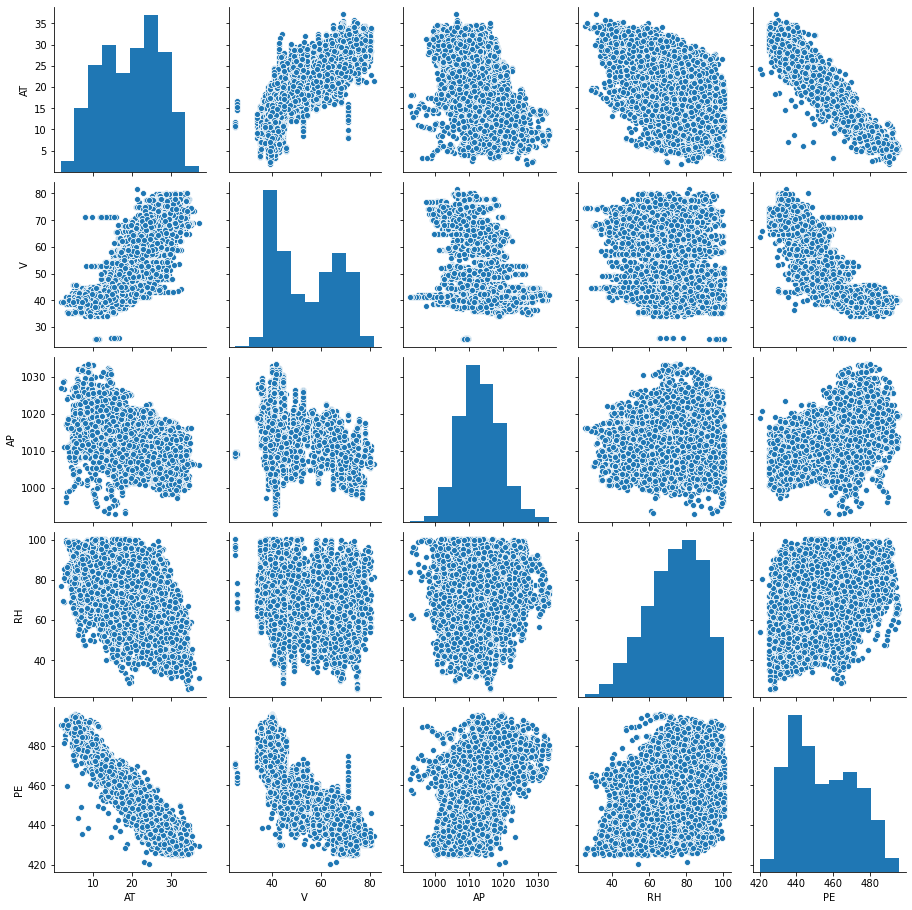

In [5]:
sns.pairplot(data=df)

In [6]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<AxesSubplot:xlabel='PE'>

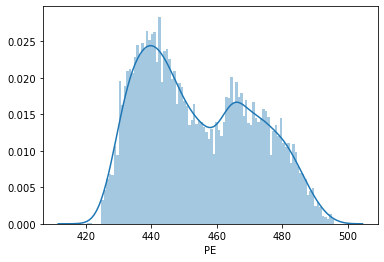

In [7]:
# Examine the target variable
sns.distplot(df['PE'], bins=100)

## Prepare and Split the Data for training

In [8]:
# Split data into training and test sets
X = df.drop('PE', axis=1).values
y = df['PE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Create different regression models with standard parameters

#### Model 1: Linear Regression

In [9]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

#Predictions
y_pred_lin_regressor = lin_regressor.predict(X_test)
np.concatenate((y_pred_lin_regressor.reshape(len(y_pred_lin_regressor),1), y_test.reshape(len(y_test),1)),1)

array([[431.43, 431.23],
       [458.56, 460.01],
       [462.75, 461.14],
       ...,
       [469.52, 473.26],
       [442.42, 438.  ],
       [461.88, 463.28]])

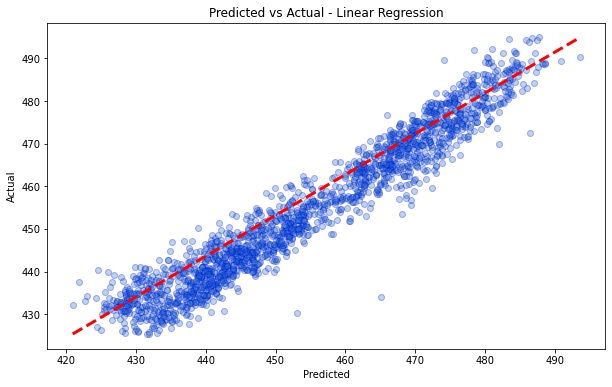

In [10]:
plt.figure(figsize= (10,6))
plt.scatter(y_pred_lin_regressor, y_test, edgecolors=(0,0,1), alpha=0.3)
plt.plot([y_pred_lin_regressor.min(), y_pred_lin_regressor.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual - Linear Regression')
plt.show()

#### Model 2: Polynomial Regression

In [11]:
poly_features = PolynomialFeatures()
X_poly = poly_features.fit_transform(X_train)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

#Predictions
y_pred_poly_regressor = poly_regressor.predict(poly_features.transform(X_test))
np.concatenate((y_pred_poly_regressor.reshape(len(y_pred_poly_regressor),1), y_test.reshape(len(y_test),1)),1)

array([[432.77, 431.23],
       [457.41, 460.01],
       [462.02, 461.14],
       ...,
       [468.92, 473.26],
       [441.36, 438.  ],
       [461.12, 463.28]])

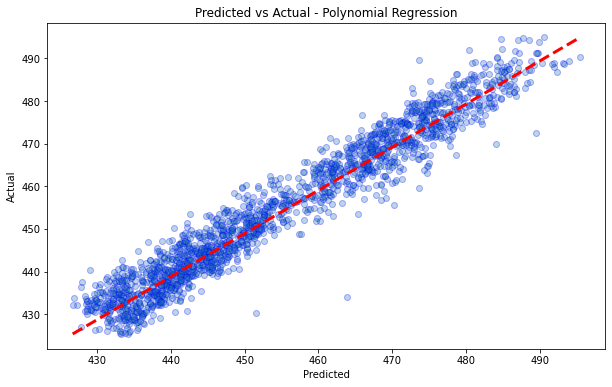

In [12]:
plt.figure(figsize= (10,6))
plt.scatter(y_pred_poly_regressor, y_test, edgecolors=(0,0,1), alpha=0.3)
plt.plot([y_pred_poly_regressor.min(), y_pred_poly_regressor.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual - Polynomial Regression')
plt.show()

#### Model 3: Support Vector Regression

In [13]:
# No coefficients so need to scale data
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train)
y_train_svr = sc_y.fit_transform(y_train.reshape(len(y_train), 1))

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_svr,y_train_svr)

#Predictions
scaled_pred = svr_regressor.predict(sc_X.transform(X_test))
unscaled_pred = sc_y.inverse_transform(scaled_pred)

c:\users\14803\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
y_test.shape

(1914,)

In [15]:
unscaled_pred.shape

(1914,)

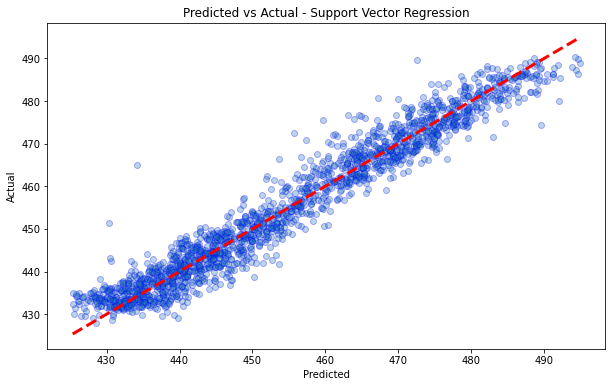

In [16]:
plt.figure(figsize= (10,6))

plt.scatter(y_test , unscaled_pred, edgecolors=(0,0,1), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual - Support Vector Regression')
plt.show()


#### Model 4: Decision Tree

In [17]:
dtree_regressor = DecisionTreeRegressor()
dtree_regressor.fit(X_train, y_train)

#Make predictions
y_pred_dtree_regressor = dtree_regressor.predict(X_test)
np.concatenate((y_pred_dtree_regressor.reshape(len(y_pred_dtree_regressor),1), y_test.reshape(len(y_test),1)),1)

array([[429.06, 431.23],
       [459.59, 460.01],
       [460.06, 461.14],
       ...,
       [471.46, 473.26],
       [437.76, 438.  ],
       [462.55, 463.28]])

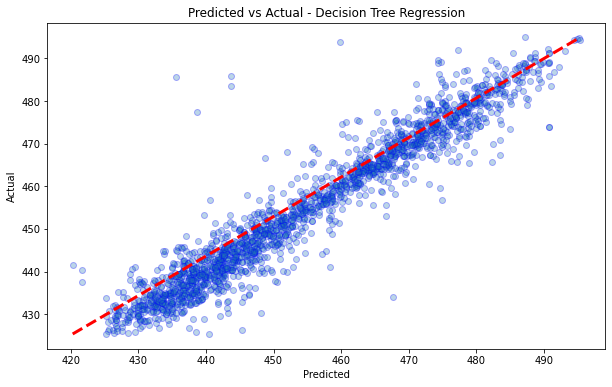

In [18]:
plt.figure(figsize= (10,6))
plt.scatter(y_pred_dtree_regressor, y_test, edgecolors=(0,0,1), alpha=0.3)
plt.plot([y_pred_dtree_regressor.min(), y_pred_dtree_regressor.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual - Decision Tree Regression')
plt.show()

#### Model 5: Random Forest

In [19]:
rand_for_regressor = RandomForestRegressor()
rand_for_regressor.fit(X_train, y_train)

#Make predictions
y_pred_rand_for_regressor = rand_for_regressor.predict(X_test)
np.concatenate((y_pred_rand_for_regressor.reshape(len(y_pred_rand_for_regressor),1), y_test.reshape(len(y_test),1)),1)

array([[433.65, 431.23],
       [457.71, 460.01],
       [463.72, 461.14],
       ...,
       [469.35, 473.26],
       [439.14, 438.  ],
       [461.12, 463.28]])

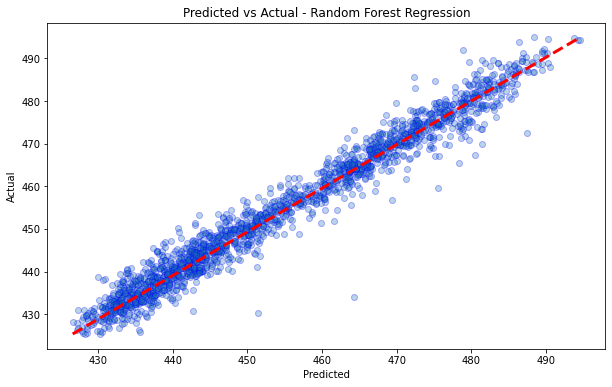

In [20]:
plt.figure(figsize= (10,6))
plt.scatter(y_pred_rand_for_regressor, y_test, edgecolors=(0,0,1), alpha=0.3)
plt.plot([y_pred_rand_for_regressor.min(), y_pred_rand_for_regressor.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual - Random Forest Regression')
plt.show()

## Standard Parameter Model Evaluation

In [21]:
print('Linear Regression  R2: '+ np.str(metrics.r2_score(y_test,y_pred_lin_regressor)))
print('Linear Regression  RMSE: '+ np.str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin_regressor))))
print()
print('Polynomial Regression  R2: '+ np.str(metrics.r2_score(y_test,y_pred_poly_regressor)))
print('Polynomial Regression  RMSE: '+ np.str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly_regressor))))
print()
print('Support Vector Regression  R2: '+ np.str(metrics.r2_score(y_test,unscaled_pred)))
print('Support Vector Regression  RMSE: '+ np.str(np.sqrt(metrics.mean_squared_error(y_test, unscaled_pred))))
print()
print('Decision Tree Regression  R2: '+ np.str(metrics.r2_score(y_test,y_pred_dtree_regressor)))
print('Decision Tree Regression  RMSE: '+ np.str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtree_regressor))))
print()
print('Random Forest Regression  R2: '+ np.str(metrics.r2_score(y_test,y_pred_rand_for_regressor)))
print('Random Forest Regression  RMSE: '+ np.str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand_for_regressor))))

Linear Regression  R2: 0.9325315554761303
Linear Regression  RMSE: 4.44226285844249

Polynomial Regression  R2: 0.9421687659462453
Polynomial Regression  RMSE: 4.112776735104036

Support Vector Regression  R2: 0.9480784049986258
Support Vector Regression  RMSE: 3.8969776670879237

Decision Tree Regression  R2: 0.9203456778581329
Decision Tree Regression  RMSE: 4.826791923387867

Random Forest Regression  R2: 0.9655496021556802
Random Forest Regression  RMSE: 3.1743223367642166


## Tune the Random Forest Model

In [22]:
# Detault Parameters

pprint(rand_for_regressor.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### Create Random Grid

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [25]:
# Create a new random forest model to tune
ran_for = RandomForestRegressor()

# Use 3 fold cross validation and evaluate over 10 different combinations.
# Limiting to 30 fits since I can only use local machine.
rf_random = RandomizedSearchCV(estimator = ran_for, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [26]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   30.4s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   52.1s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

#### Create the optimized Random Forest Model

In [42]:
best_rf_model= rf_random.best_estimator_.fit(X_train,y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [43]:
# Show the optimal hyperparameters
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

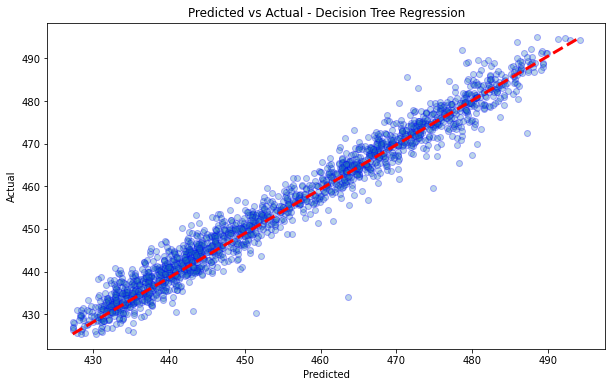

In [33]:
plt.figure(figsize= (10,6))
plt.scatter(y_pred_best_rf, y_test, edgecolors=(0,0,1), alpha=0.3)
plt.plot([y_pred_best_rf.min(), y_pred_best_rf.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual - Random Forest')
plt.show()

#### Compare the default random forest model with the optimzied random forest model

In [51]:
print('Original Random Forest Regression  R2: '+ np.str(metrics.r2_score(y_test,y_pred_rand_for_regressor)))
print('Original Forest Regression  RMSE: '+ np.str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand_for_regressor))))
print()
print('Optimized Random Forest Regression  R2: '+ np.str(metrics.r2_score(y_test,y_pred_best_rf)))
print('Optimized Forest Regression  RMSE: '+ np.str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_rf))))
print('Optimized Forest Regression  Adjusted R2: '+ np.str(1-(1-metrics.r2_score(y_test,y_pred_best_rf)*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))))

Original Random Forest Regression  R2: 0.9655496021556802
Original Forest Regression  RMSE: 3.1743223367642166

Optimized Random Forest Regression  R2: 0.9675825879378498
Optimized Forest Regression  RMSE: 3.079236705199256
Optimized Forest Regression  Adjusted R2: 0.9696100003798358


# Not much improvement is gained.  Use the random forest model with the optimized parameters.